In [195]:
import numpy as np
import autograd.numpy as np_   # Thinly-wrapped version of Numpy
from autograd import grad
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [196]:
df = pd.read_csv('healthcare-dataset-stroke-data.csv')
# pd.get_dummies(df) é usado para converter variáveis categóricas em variáveis dummy/indicadoras.
df_ = pd.get_dummies(df)
#Dois filtros são criados para separar as linhas em que o acidente vascular cerebral está presente (filtro_avc) 
#e onde o acidente vascular cerebral está ausente (filtro_ausencia).
filtro_ausencia = df_['stroke'] == 0
filtro_avc = df_['stroke'] == 1
#df_avc e df_ausencia são criados aplicando esses filtros ao dataframe original df_. df_ausencia é então fatiado para conter as primeiras 249 linhas.
df_avc = df_[filtro_avc]
df_ausencia = df_[filtro_ausencia]
df_ausencia = df_ausencia.iloc[0:249]
#pd.concat() é usado para combinar df_avc e df_ausencia em um único dataframe df_, onde as primeiras 249 
#linhas representam a ausência de acidente vascular cerebral e as linhas restantes representam a presença de acidente vascular cerebral.
df_ = pd.concat([df_ausencia, df_avc])
#Esse processo tem como objetivo criar um conjunto de dados equilibrado com representação
#igual de casos de acidente vascular cerebral e não-acidente vascular cerebral, o que é
#importante para treinar modelos de aprendizado de máquina que precisam prever o acidente vascular cerebral.


In [197]:
# remove as linhas de id (pois não é uma feature),  bmi e avg_glucose_level (pois contém valores nulos)
df_ = df_.drop('bmi', axis=1)
df_ = df_.drop('id', axis = 1)
df_ = df_.drop('avg_glucose_level', axis= 1)




In [198]:
#dividimos o conjunto de dados em duas partes, um conjunto de treinamento e um conjunto de teste, para que 
#um modelo de aprendizado de máquina possa ser treinado e testado em dados independentes.

# atribui a variável y à coluna 'stroke' do dataframe df_, que contém a variável de destino que o modelo deve prever.
y = df_['stroke']
# atribui a variável X a todas as colunas do dataframe df_, exceto a coluna 'stroke', que contém as variáveis de entrada que o modelo deve usar para fazer previsões.
X = df_.drop('stroke', axis = 1)

#Usamos a função train_test_split da biblioteca Scikit-learn para dividir X e y em conjuntos de treinamento e teste. O argumento train_size=0.5 indica que o conjunto de treinamento deve ter 50% dos dados.
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.5)
y_train.replace(0,-1,inplace=True)
y_test.replace(0,-1,inplace=True)




In [199]:
X_train

,age,hypertension,heart_disease,gender_Female,gender_Male,gender_Other,ever_married_No,ever_married_Yes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
379,53.0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0
15,50.0,1,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0
377,25.0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,1,0,0,0
429,53.0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0
107,54.0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104,57.0,0,0,1,0,0,0,1,1,0,0,0,0,0,1,1,0,0,0
202,77.0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0
39,49.0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0
221,79.0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0


In [200]:
# Define a função de perda com parâmetros que incluem os pontos de treinamento, os valores alvo,
# bem como os pesos e o bias (w e b) que precisam ser ajustados para minimizar a perda.
def loss(parametros):
    w, b, pontos, val = parametros
    est = w.T @ pontos + b
    mse = np_.mean((est - val)**2)
    return mse

# Calcula o gradiente da função de perda para atualizar os pesos e bias durante o treinamento.
g = grad(loss)

# Transforma os dados de treinamento em matrizes numpy para serem usados pelo modelo.
pontos = X_train.to_numpy().T.astype('float64')
alvos = y_train.to_numpy().astype('float64')



# Inicializa os pesos aleatoriamente com uma matriz 19x1, já que temos 19 features e 1 saída.
w = np.random.randn(19, 1)

# Inicializa o bias com um valor de 0.4.
b = 0.4

# Define a taxa de aprendizado como 0.0001.
alpha = 0.0001



# Realiza o treinamento por 100000 iterações.
for n in range(100000):
    # Calcula o gradiente da perda para os pesos e bias atuais.
    
    grad_ = g((w, b, pontos, alvos))
    
    # Atualiza os pesos e bias usando o gradiente e a taxa de aprendizado.
    # isso é feito para conseguirmos cada vez mais os valores de w e b que minimizam a função de perda para 
    # poder prever o acidente vascular cerebral com maior precisão.
    w -= alpha*grad_[0]
    b -= alpha*grad_[1]



# Imprime os pesos e bias finais encontrados pelo modelo.



In [201]:
# pesos finais , bias final, obtidos pelo modelo
w = np.array( [[ 0.02094428],
 [-0.21445833],
 [ 0.6577861 ],
 [-0.35460928],
 [-0.38022536],
 [-0.2819132 ],
 [ 0.20026206],
 [ 0.66349113],
 [-1.14187107],
 [ 0.64376888],
 [-1.22903083],
 [-1.08831961],
 [-0.56650547],
 [-0.11347422],
 [-0.01975742],
 [ 0.29558652],
 [ 0.50416015],
 [ 0.46374331],
 [ 0.13877041]])
b = -0.3
def accuracy(y_test, y_est):
    # Calcula a acurácia do modelo, que é a proporção de valores alvo que foram previstos corretamente.
    return np.mean(np.sign(y_test)==np.sign(y_est))
# Transforma os dados de teste em matrizes numpy para serem usados pelo modelo.
pontos = X_test.to_numpy().T.astype('float64')
alvos = y_test.to_numpy().astype('float64')
# Calcula as previsões do modelo para os dados de teste.
est = w.T @ pontos+ b

print("Acurácia do nosso modelo treinado com regressão linear: ", accuracy(est, alvos))

Acurácia do nosso modelo treinado com regressão linear:  0.7028112449799196


In [202]:
# Calcula a acurácia do modelo de hipótese nula, que é a proporção de valores alvo que foram previstos corretamente.

print("Acurácia do modelo de hipótese nula: ", 249/(249+249))

Acurácia do modelo de hipótese nula:  0.5


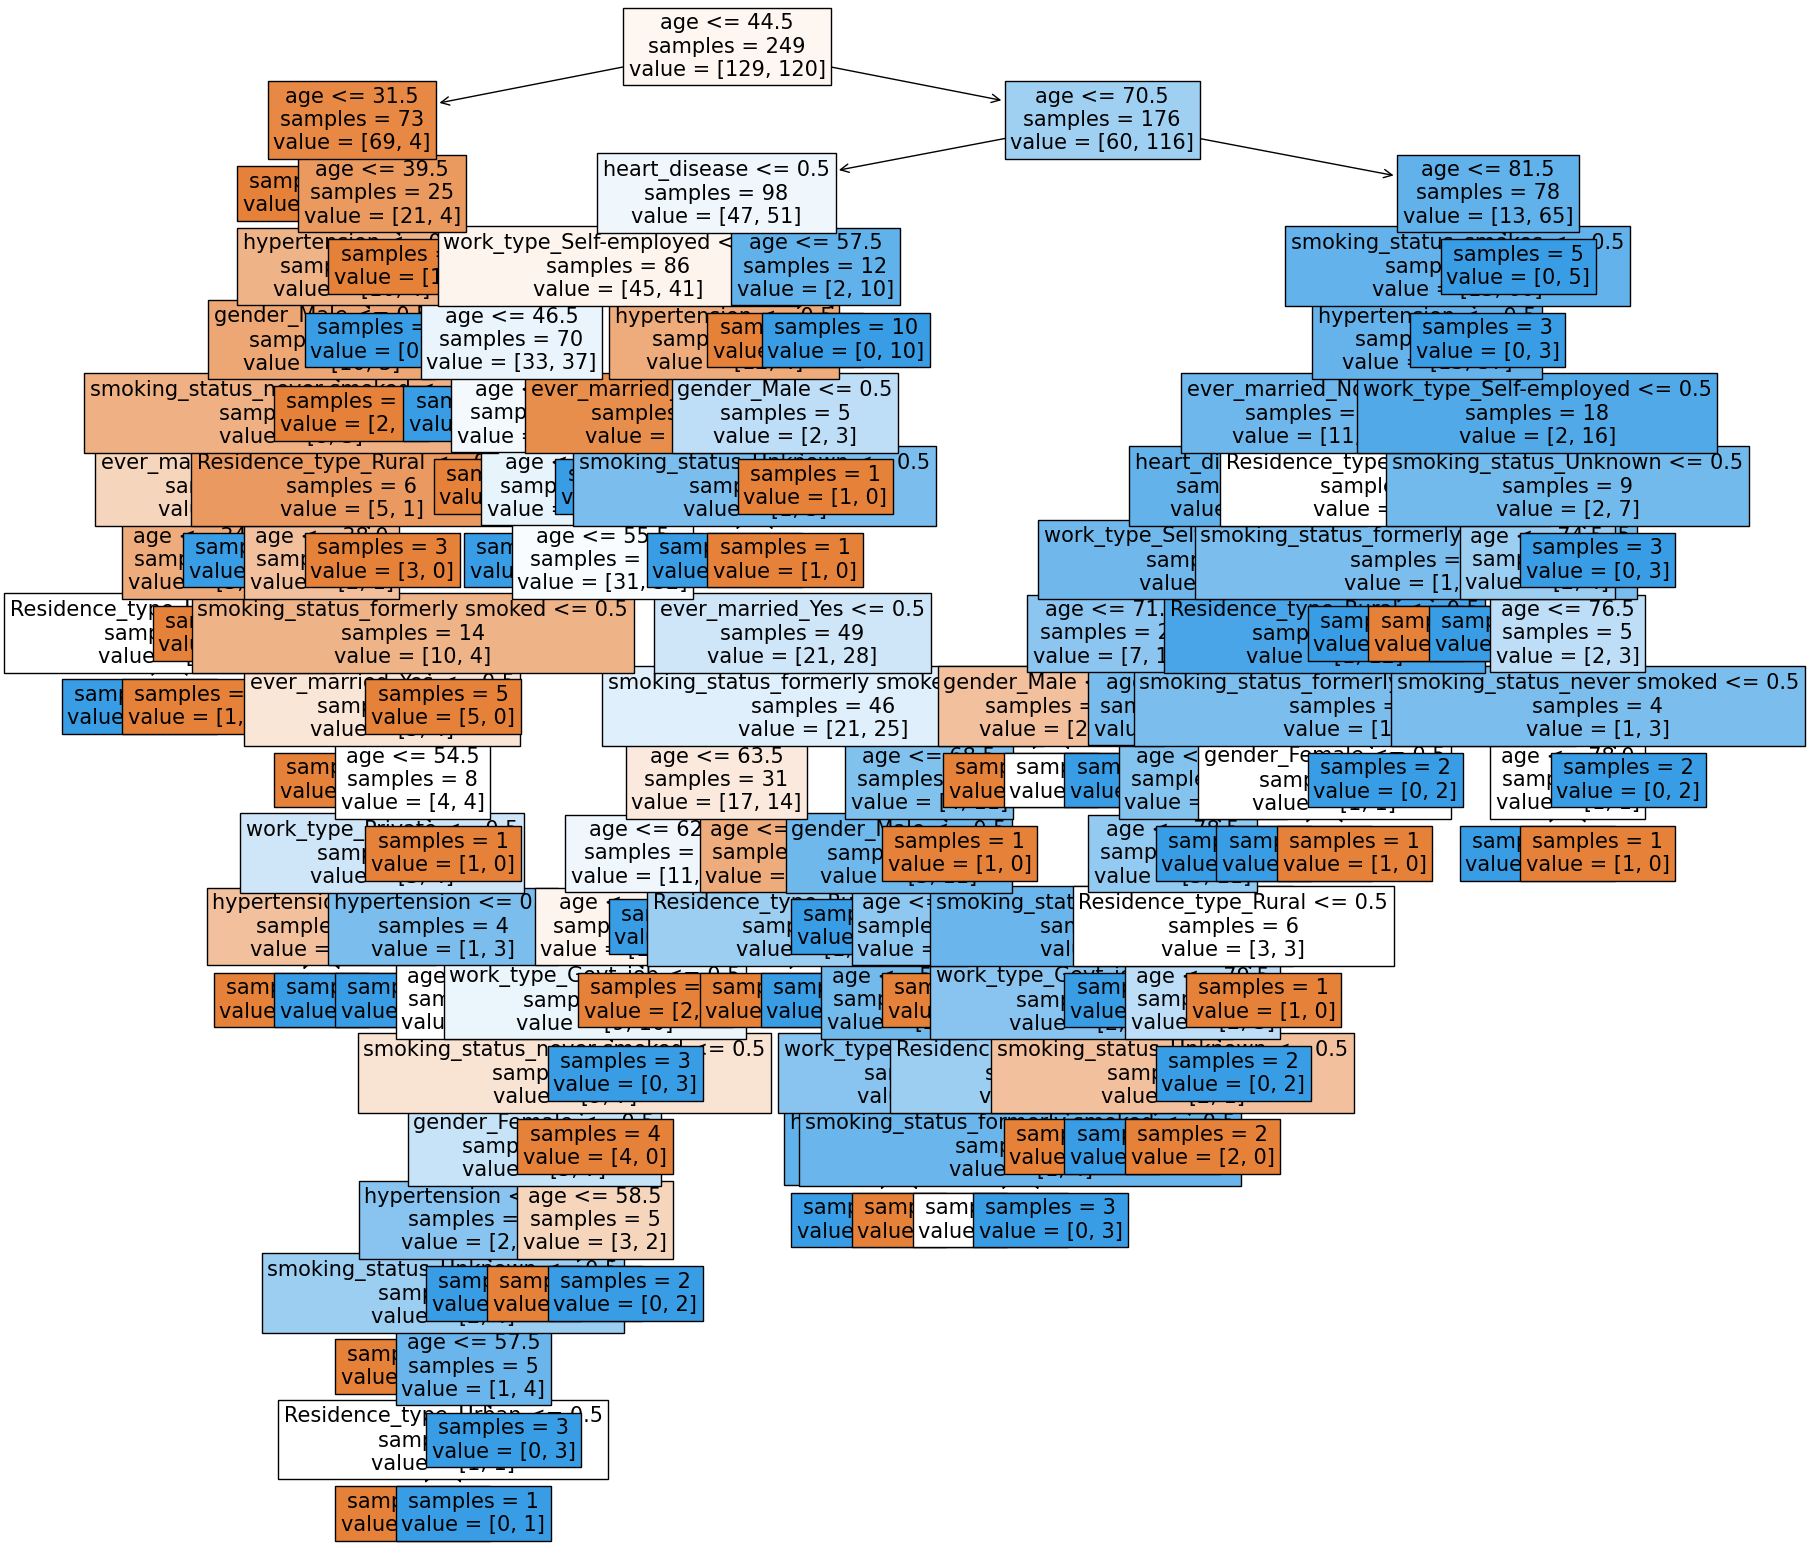

In [203]:
from sklearn.tree import DecisionTreeClassifier
# Cria um modelo de árvore de decisão 
tree = DecisionTreeClassifier(criterion='entropy')
# Treina o modelo com os dados de treinamento
tree.fit(X_test, y_test)
# Calcula as previsões do modelo para os dados de teste.
from sklearn.tree import plot_tree
plt.figure(figsize=(20,20))
a = plot_tree(tree, feature_names=X_test.columns, fontsize=15, node_ids=False, impurity=False, filled=True)